## Remoção de ruído de imagens

**Importação das bibliotecas**

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.12.0'

**Carregamento da base de dados**

In [53]:
from tensorflow.keras.datasets import mnist

In [58]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Visualização dos dados**

In [59]:
X_train.shape

(60000, 28, 28)

In [60]:
X_test.shape

(10000, 28, 28)

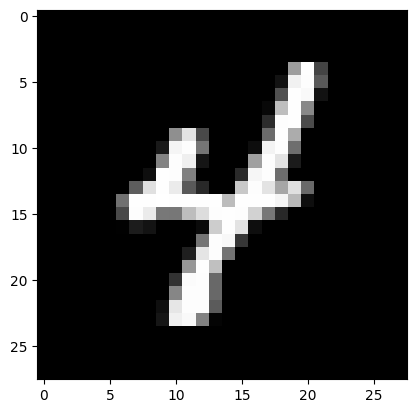

In [61]:
i = random.randint(0, 60000)
plt.imshow(X_train[i], cmap = 'gray')


In [62]:
label = y_train[i]
label

4

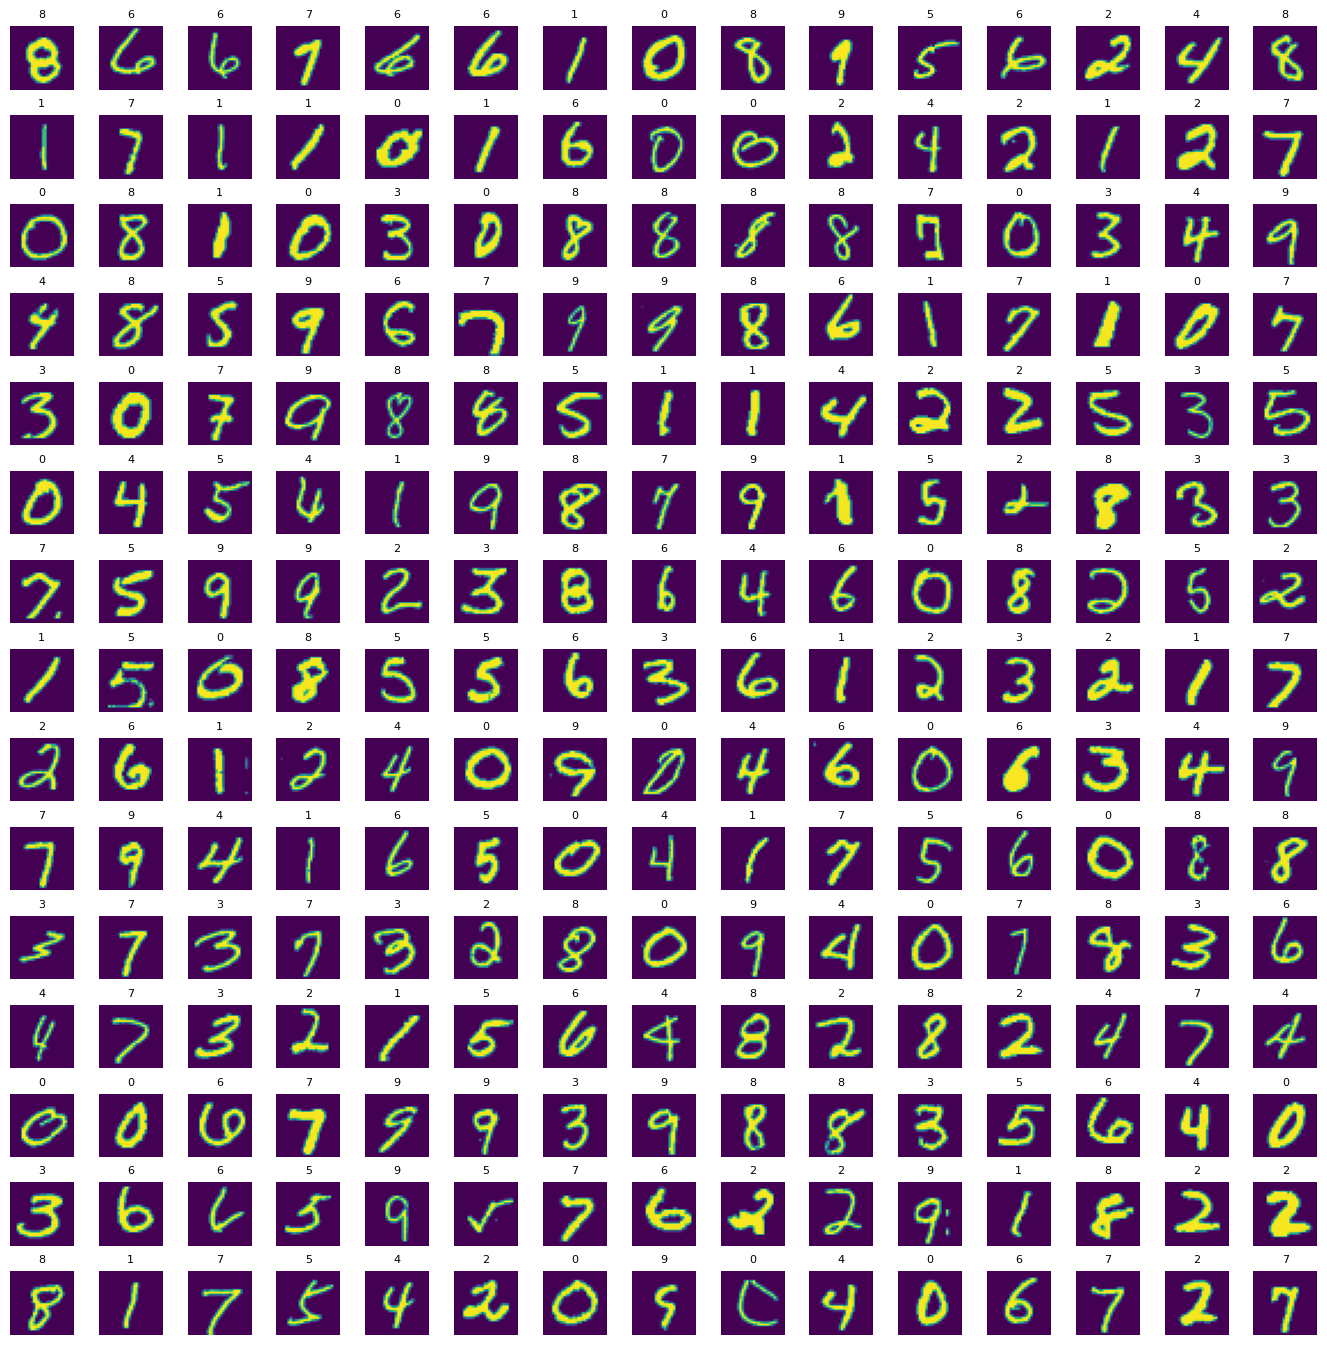

In [63]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, W_grid * L_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index], fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

**Adição de ruído nas imagens**

In [64]:
X_train = X_train / 255
X_test = X_test / 255

In [65]:
added_noise = np.random.randn(*(28, 28)) 

In [66]:
added_noise.shape

(28, 28)

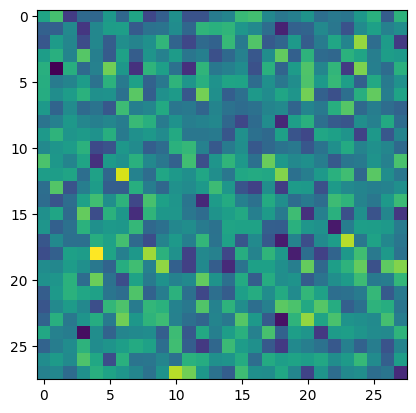

In [67]:
plt.imshow(added_noise);

In [68]:
noise_factor = 0.3
added_noise = noise_factor * np.random.randn(*(28,28))

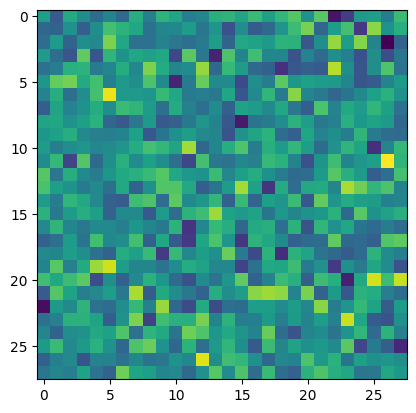

In [69]:
plt.imshow(added_noise);

In [70]:
noise_factor = 0.2
sample_image = X_train[10]
noisy_sample_image = sample_image + noise_factor * np.random.randn(*(28, 28))

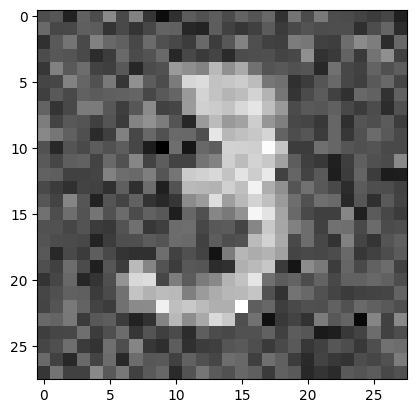

In [71]:
plt.imshow(noisy_sample_image, cmap = 'gray')

In [72]:
noisy_sample_image.max()

1.425591888679628

In [73]:
noisy_sample_image.min()

-0.6398896661233969

In [74]:
noisy_sample_image = np.clip(noisy_sample_image, 0., 1.)

In [75]:
noisy_sample_image.max()

1.0

In [76]:
noisy_sample_image.min()

0.0

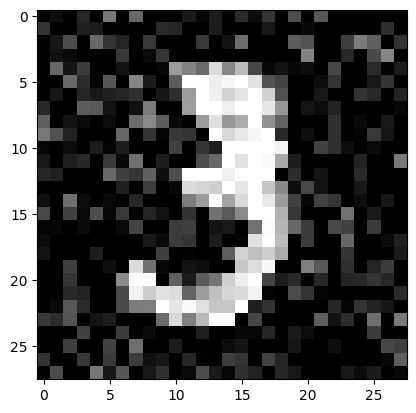

In [77]:
plt.imshow(noisy_sample_image, cmap='gray');

In [78]:
X_train_noisy = []
noise_factor = 0.4

for sample_image in X_train:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28, 28))
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
  X_train_noisy.append(sample_image_noisy)

In [79]:
type(X_train_noisy)

list

In [80]:
X_train_noisy = np.array(X_train_noisy)
type(X_train_noisy)

numpy.ndarray

In [81]:
X_train_noisy.shape

(60000, 28, 28)

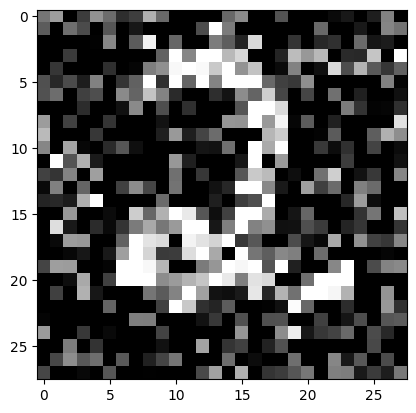

In [82]:
plt.imshow(X_train_noisy[378], cmap='gray');

In [83]:
X_test_noisy = []
noise_factor = 0.2

for sample_image in X_test:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
  X_test_noisy.append(sample_image_noisy)

In [84]:
X_test_noisy = np.array(X_test_noisy)
type(X_test_noisy)

numpy.ndarray

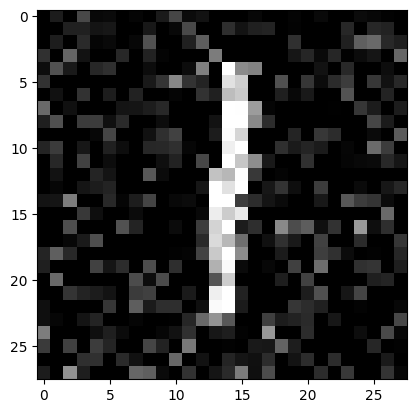

In [85]:
plt.imshow(X_test_noisy[378], cmap='gray');

**Criação e treinamento do modelo**

In [86]:
from keras.layers.convolutional.conv2d_transpose import Conv2DTranspose
autoencoder = tf.keras.models.Sequential()

#Encoder
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides = 1, padding = 'same',
                                       input_shape = (28, 28, 1)))
autoencoder.add(tf.keras.layers.MaxPooling2D((2, 2), padding = 'same'))

autoencoder.add(tf.keras.layers.Conv2D(8, (3, 3), strides = 1, padding = 'same'))
autoencoder.add(tf.keras.layers.MaxPooling2D((2, 2), padding = 'same'))

#Encoded image
autoencoder.add(tf.keras.layers.Conv2D(8, (3, 3), strides = 1, padding = 'same'))

autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))
autoencoder.add(tf.keras.layers.Conv2DTranspose(8, (3, 3), strides = 1,
                                                padding = 'same'))

autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))
autoencoder.add(tf.keras.layers.Conv2DTranspose(1, (3, 3), strides = 1,
                                                padding = 'same', 
                                                activation = 'sigmoid'))

autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 up_sampling2d_6 (UpSampling  (None, 14, 14, 8)       

In [87]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001))


In [88]:
autoencoder.fit(X_train_noisy.reshape(-1, 28, 28, 1),
                X_train.reshape(-1, 28, 28, 1),
                epochs = 100,
                batch_size = 200)


Epoch 1/100
300/300 [==============================] - 4s 6ms/step - loss: 0.2361
Epoch 2/100
300/300 [==============================] - 1s 4ms/step - loss: 0.1297
Epoch 3/100
300/300 [==============================] - 1s 4ms/step - loss: 0.1201
Epoch 4/100
300/300 [==============================] - 1s 4ms/step - loss: 0.1161
Epoch 5/100
300/300 [==============================] - 1s 5ms/step - loss: 0.1136
Epoch 6/100
300/300 [==============================] - 1s 4ms/step - loss: 0.1118
Epoch 7/100
300/300 [==============================] - 1s 4ms/step - loss: 0.1105
Epoch 8/100
300/300 [==============================] - 1s 4ms/step - loss: 0.1097
Epoch 9/100
300/300 [==============================] - 2s 6ms/step - loss: 0.1088
Epoch 10/100
300/300 [==============================] - 2s 5ms/step - loss: 0.1083
Epoch 11/100
300/300 [==============================] - 1s 4ms/step - loss: 0.1078
Epoch 12/100
300/300 [==============================] - 1s 4ms/step - loss: 0.1075
Epoch 13/100


**Avaliação do modelo**

In [89]:
denoised_images = autoencoder.predict(X_test_noisy[:15].reshape(-1,28,28,1))

1/1 [==============================] - 0s 103ms/step


In [90]:
denoised_images.shape

(15, 28, 28, 1)

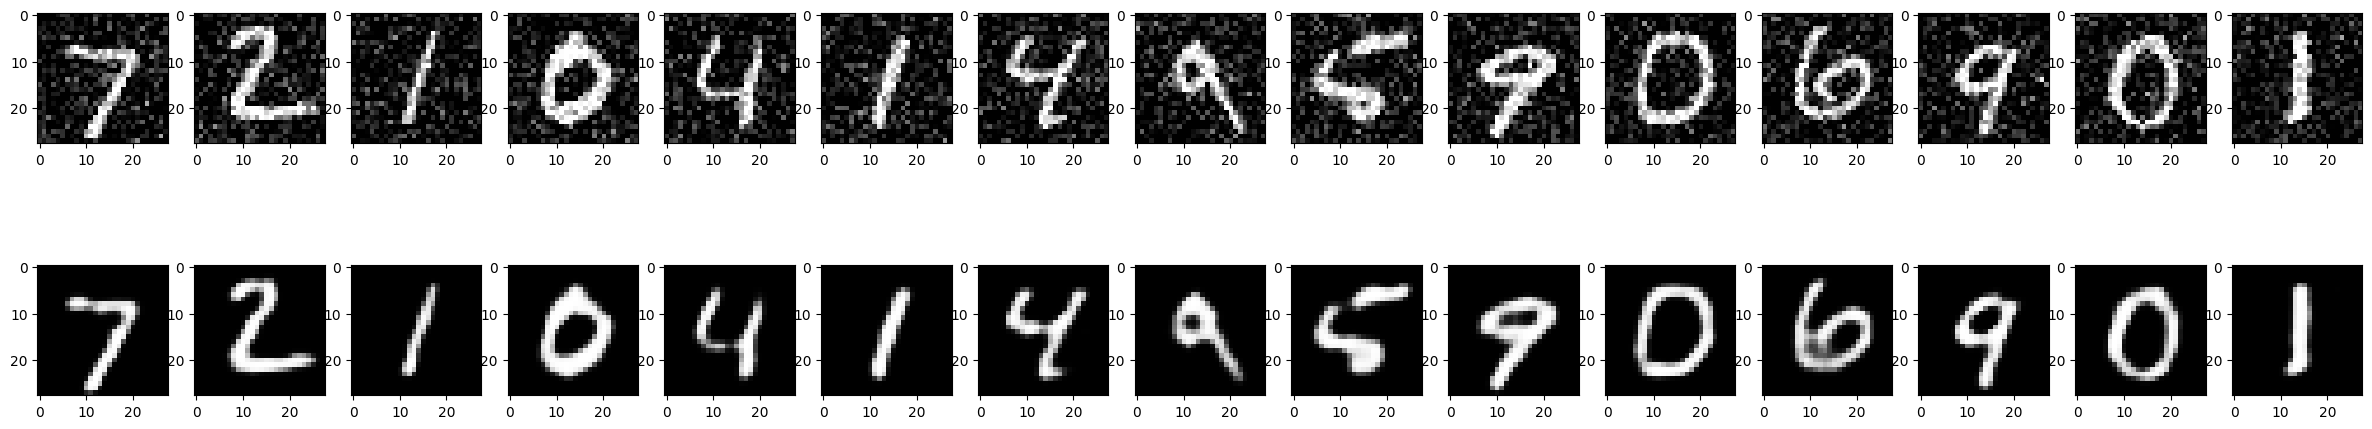

In [91]:
fig, axes = plt.subplots(nrows = 2, ncols = 15, figsize = (30, 6))
for images, row in zip([X_test_noisy[:15], denoised_images], axes):
  for img, ax in zip(images, row):
    ax.imshow(img.reshape((28, 28)), cmap = 'gray')

**Confirmação das dimensões**

Notas: 


*   Se stride = 1 e padding = same, as dimensões da saída serão iguais as dimensões da entrada. Exemplo: 
> autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same", input_shape=(28, 28, 1)))
* Se stride = 2 e padding = same, as dimensões da saída serão menores (metade)
> autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=2, padding="same", input_shape=(28, 28, 1)))

* Padding = 'same' indica que preservaremos as dimensões de entrada
* Padding = 'valid' indica que perderemos um pouco de informação (não será adiciona preenchimento ao redor da imagem)

Artigo: https://www.corvil.com/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow



In [ ]:
# W = 28, F = 3, S = 1, Padding = same (P=F-1/2=1)
# o = (W-F+2*P/S) +1 = (28-3+2*1)/1 + 1 = 28
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same", 
                                       input_shape=(28, 28, 1)))
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# W = 28, F = 3, S = 2, Padding = same (P=F-1/2=1)
# o = (W-F+2*P/S) +1 = (28-3+2*1)/2 + 1 = 14
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=2, padding="same", 
                                       input_shape=(28, 28, 1)))
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 14, 14, 16)        160       
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Quando padding = valid, não são adicionadas "bordas" para preencher a imagem 
# W = 28, F = 3, S = 1, Padding = valid (P=0)
# o = (W-F+2*P/S) +1 = (28-3+0)/1 + 1 = 26
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="valid", 
                                       input_shape=(28, 28, 1)))
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 16)        160       
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Quando padding = valid, não são adicionadas "bordas" para preencher a imagem
# W = 28, F = 3, S = 2, Padding = valid (P=0)
# o = (W-F+2*P/S) +1 = (28-3+0)/2 + 1 = 13
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=2, padding="valid", 
                                       input_shape=(28, 28, 1)))
autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 13, 13, 16)        160       
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________
